<h1>SANTANDER BANK RECOMMENDATION SYSTEM</h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h1>DATA CLEANING AND VISUALISATION</h1>

In [3]:
dfx = pd.read_csv("train_ver2.csv", nrows=100000)


In [4]:
dfx.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
dfx.isnull().sum()

fecha_dato                    0
ncodpers                      0
ind_empleado                683
pais_residencia             683
sexo                        683
age                           0
fecha_alta                  683
ind_nuevo                   683
antiguedad                    0
indrel                      683
ult_fec_cli_1t            99872
indrel_1mes                 683
tiprel_1mes                 683
indresi                     683
indext                      683
conyuemp                 100000
canal_entrada               688
indfall                     683
tipodom                     683
cod_prov                    769
nomprov                     769
ind_actividad_cliente       683
renta                     18284
segmento                    691
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop

<h1>SPANISH TO ENGLISH</h1>

In [6]:
cols = ['fetch_date', 'cust_code', 'emp_index', 'country', 'sex', 'age', 'cust_date', 'new_cust', 'cust_seniority',
'indrel', 'last_date_as_primary', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index', 'spouse_index',
'joining_channel', 'deceased', 'address_type', 'prov_code','prov_name', 'activity_index', 'income', 'segmentation', 
'savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus', 'st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit'
]
dfx.columns = cols

<h4>DROPPING</h4>

In [7]:
df2=dfx.dropna()


In [8]:
df2.isnull().sum()

fetch_date              0.0
cust_code               0.0
emp_index               0.0
country                 0.0
sex                     0.0
age                     0.0
cust_date               0.0
new_cust                0.0
cust_seniority          0.0
indrel                  0.0
last_date_as_primary    0.0
cust_type               0.0
cust_rel                0.0
residence_index         0.0
foreigner_index         0.0
spouse_index            0.0
joining_channel         0.0
deceased                0.0
address_type            0.0
prov_code               0.0
prov_name               0.0
activity_index          0.0
income                  0.0
segmentation            0.0
savings_account         0.0
guarentees              0.0
current_account         0.0
derivative_account      0.0
payroll_account         0.0
junior_account          0.0
mas_account             0.0
perticular_account      0.0
perticular_plus         0.0
st_deposit              0.0
mt_deposits             0.0
lt_deposits         

In [9]:
df2=dfx.drop(['spouse_index', 'last_date_as_primary'], axis=1)


In [10]:
df2.shape

(100000, 46)

In [11]:
df2=df2.drop(['address_type'], axis=1)

In [12]:
len(df2)

100000

In [13]:
df2.corr()

,cust_code,new_cust,indrel,cust_type,prov_code,activity_index,income,savings_account,guarentees,current_account,...,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
cust_code,1.000000,0.003559,0.001186,-0.001728,0.037779,-0.029259,0.006008,NaN,NaN,-0.024779,...,-0.008594,0.004923,0.002546,-0.012381,-0.005595,-0.006668,-0.009389,0.036353,0.037738,0.048908
new_cust,0.003559,1.000000,0.018780,0.377930,0.003613,0.008987,-0.001902,NaN,NaN,-0.023803,...,-0.000153,-0.000518,-0.000201,-0.001993,-0.002006,0.009219,-0.000113,-0.002342,-0.002434,0.004535
indrel,0.001186,0.018780,1.000000,-0.000197,0.004302,-0.021977,-0.001001,NaN,NaN,-0.003826,...,-0.000378,-0.001280,-0.000497,-0.002837,0.005409,-0.002448,-0.000279,-0.001909,-0.000820,0.003286
cust_type,-0.001728,0.377930,-0.000197,1.000000,0.006469,0.006589,-0.000663,NaN,NaN,-0.017070,...,-0.000058,-0.000196,-0.000076,-0.000753,-0.000758,-0.000375,-0.000043,-0.001014,-0.001054,0.004357
prov_code,0.037779,0.003613,0.004302,0.006469,1.000000,0.079764,-0.018989,NaN,NaN,-0.039812,...,0.006426,0.006884,-0.000531,0.016162,0.015606,0.012655,0.002501,0.024752,0.025232,0.042049
activity_index,-0.029259,0.008987,-0.021977,0.006589,0.079764,1.000000,0.021095,NaN,NaN,-0.261176,...,0.012617,0.041578,0.015103,0.127323,0.152995,0.079878,0.009318,0.214061,0.222385,0.373071
income,0.006008,-0.001902,-0.001001,-0.000663,-0.018989,0.021095,1.000000,NaN,NaN,-0.025650,...,0.001276,0.002603,0.000215,0.011206,0.017328,0.009037,0.001456,0.013415,0.013260,0.013312
savings_account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guarentees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
current_account,-0.024779,-0.023803,-0.003826,-0.017070,-0.039812,-0.261176,-0.025650,NaN,NaN,1.000000,...,-0.022374,-0.059902,-0.014511,-0.236809,-0.255061,-0.038977,-0.014936,-0.522093,-0.544157,-0.305440


In [14]:
import seaborn as sb
import matplotlib.pyplot as mp

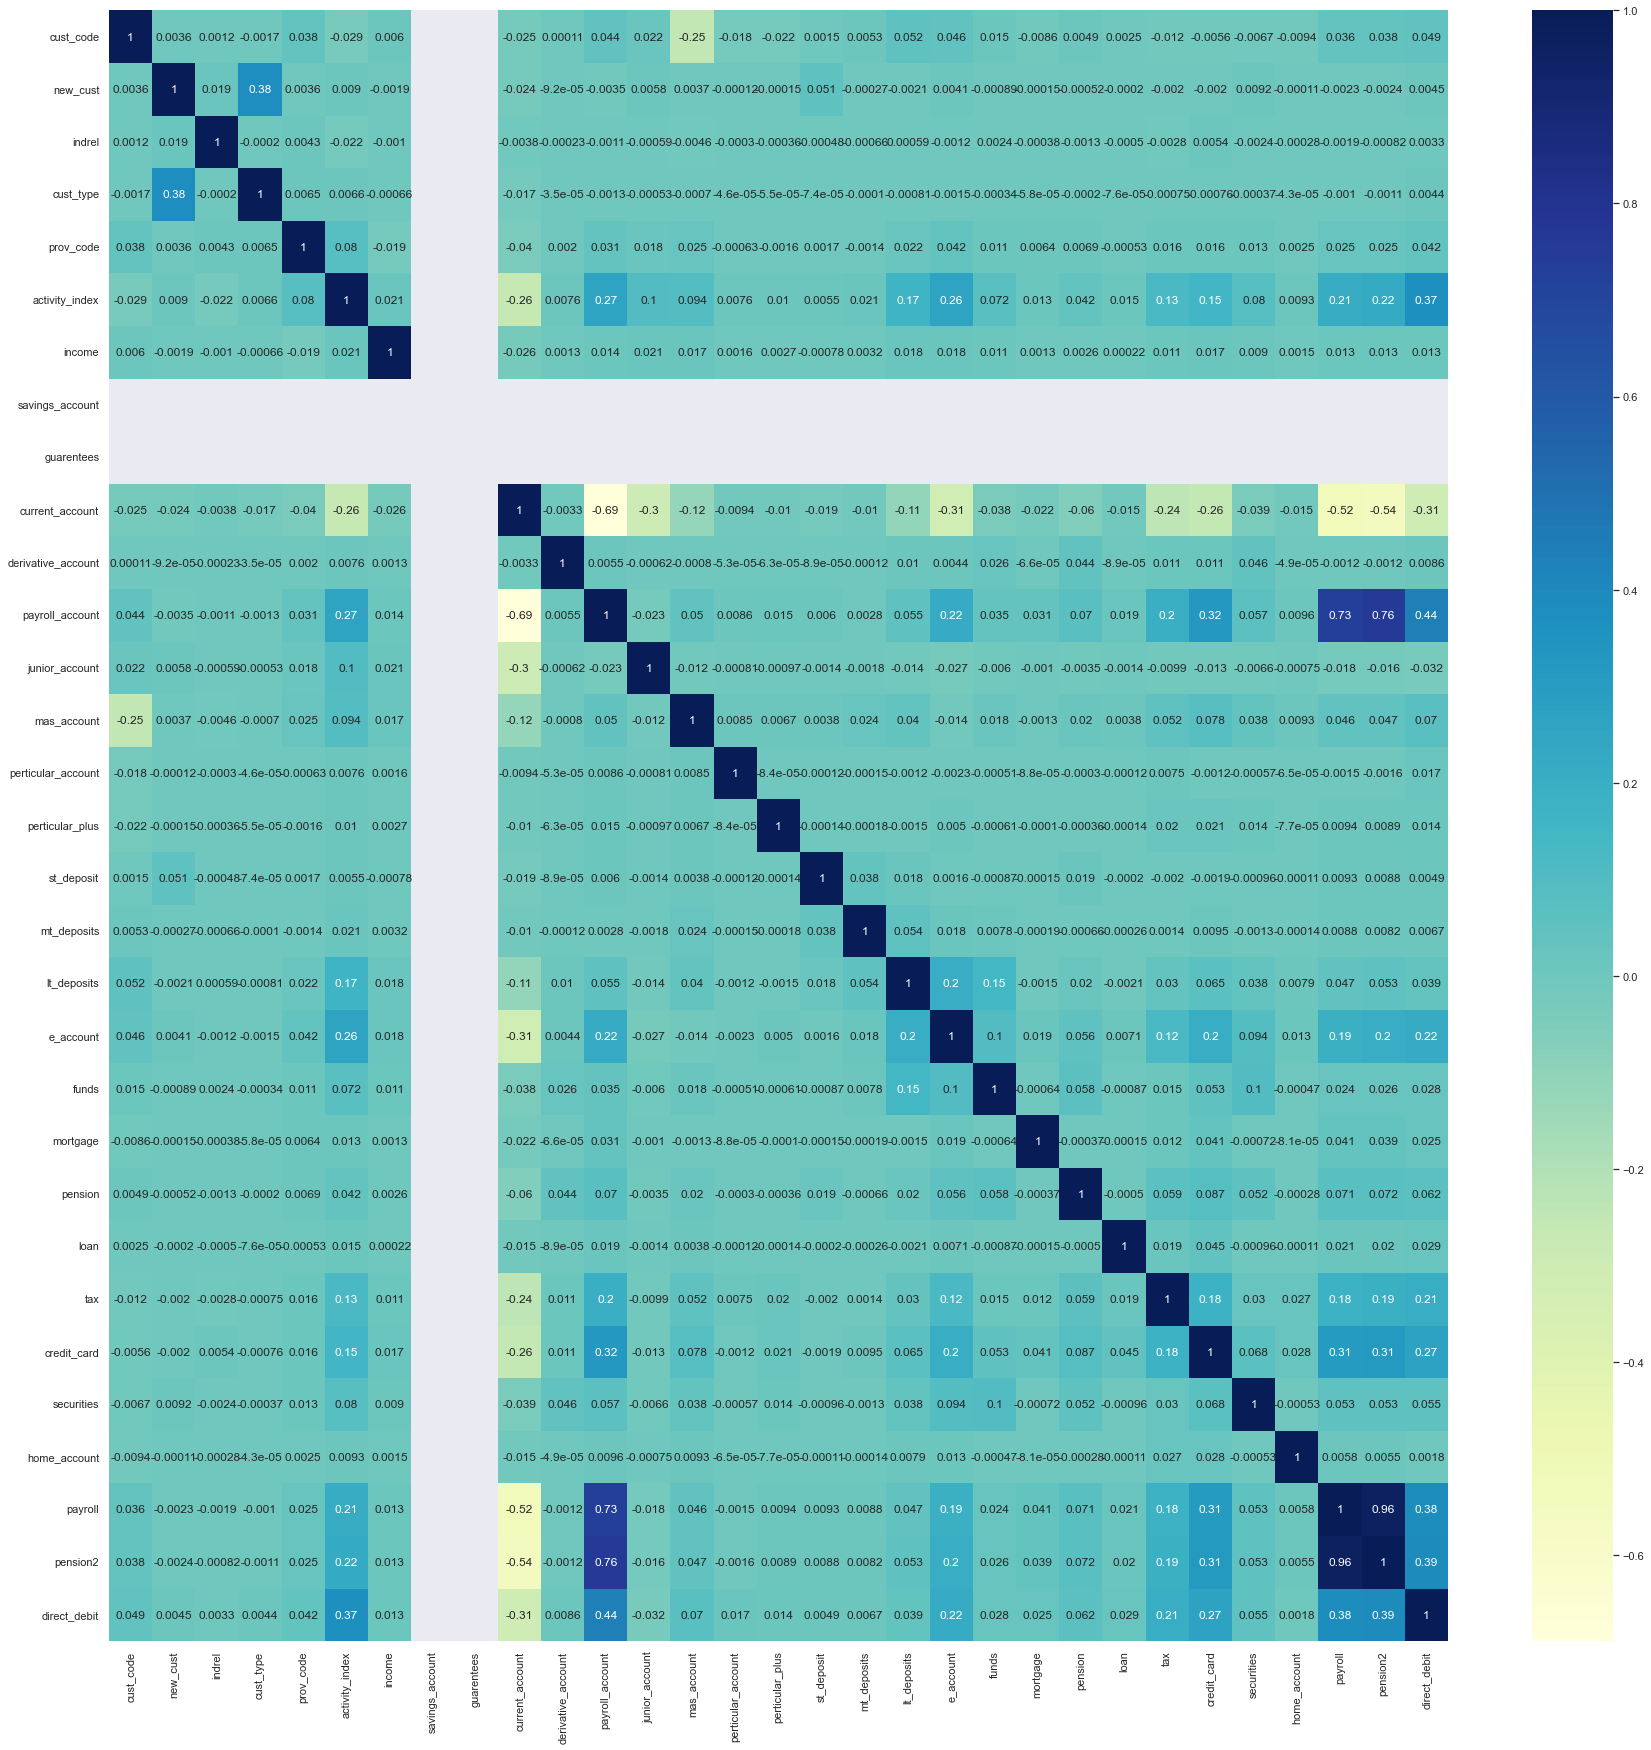

In [15]:
sb.set(rc = {'figure.figsize':(30,30)})
dataplot = sb.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
mp.show()

In [16]:
  
# Create correlation matrix
corr_mat = df2.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values()

print(sorted_mat)

current_account  payroll_account   -0.688856
payroll_account  current_account   -0.688856
current_account  pension2          -0.544157
pension2         current_account   -0.544157
payroll          current_account   -0.522093
                                      ...   
                 guarentees              NaN
pension2         savings_account         NaN
                 guarentees              NaN
direct_debit     savings_account         NaN
                 guarentees              NaN
Length: 961, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#df2['age'] = df2['age'].astype(float)

In [19]:
df2=df2.dropna()


In [20]:
len(df2)

81707

In [21]:
df2['age'] = df2['age'].astype(float)


In [22]:
df2['age'].fillna((df2['age'].mean()), inplace=True)


<h2>AGE OF USERS</h2>

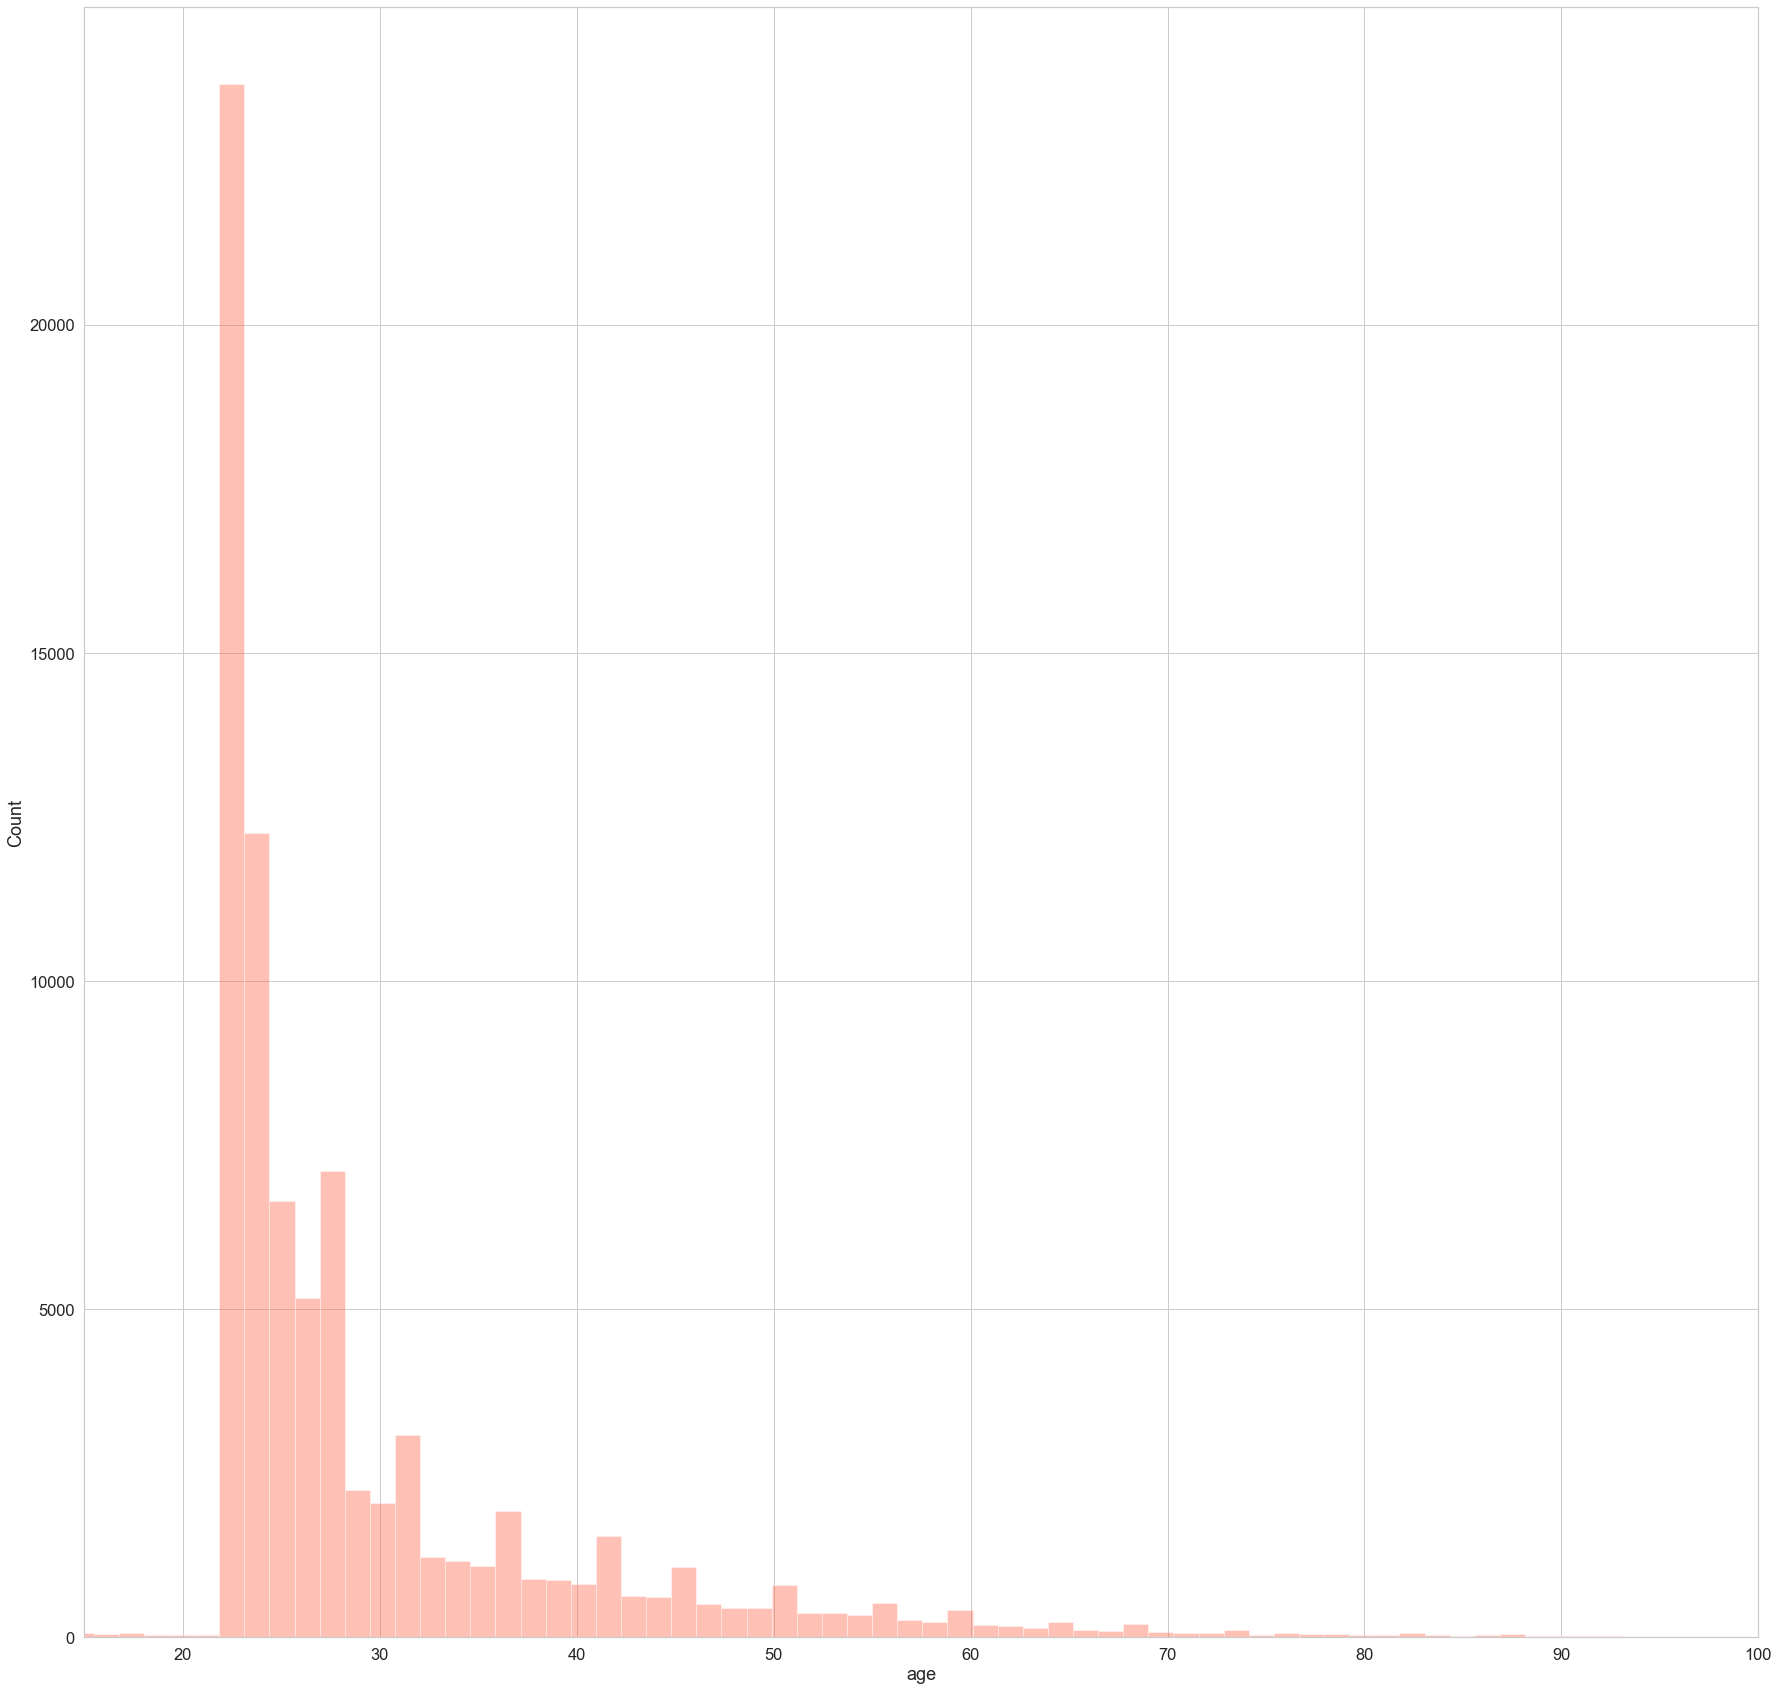

In [23]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df2["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.ylabel("Count")
    plt.xlim((15,100))

<h2>LOCALITY OF USERS</h2>

<AxesSubplot:xlabel='prov_name'>

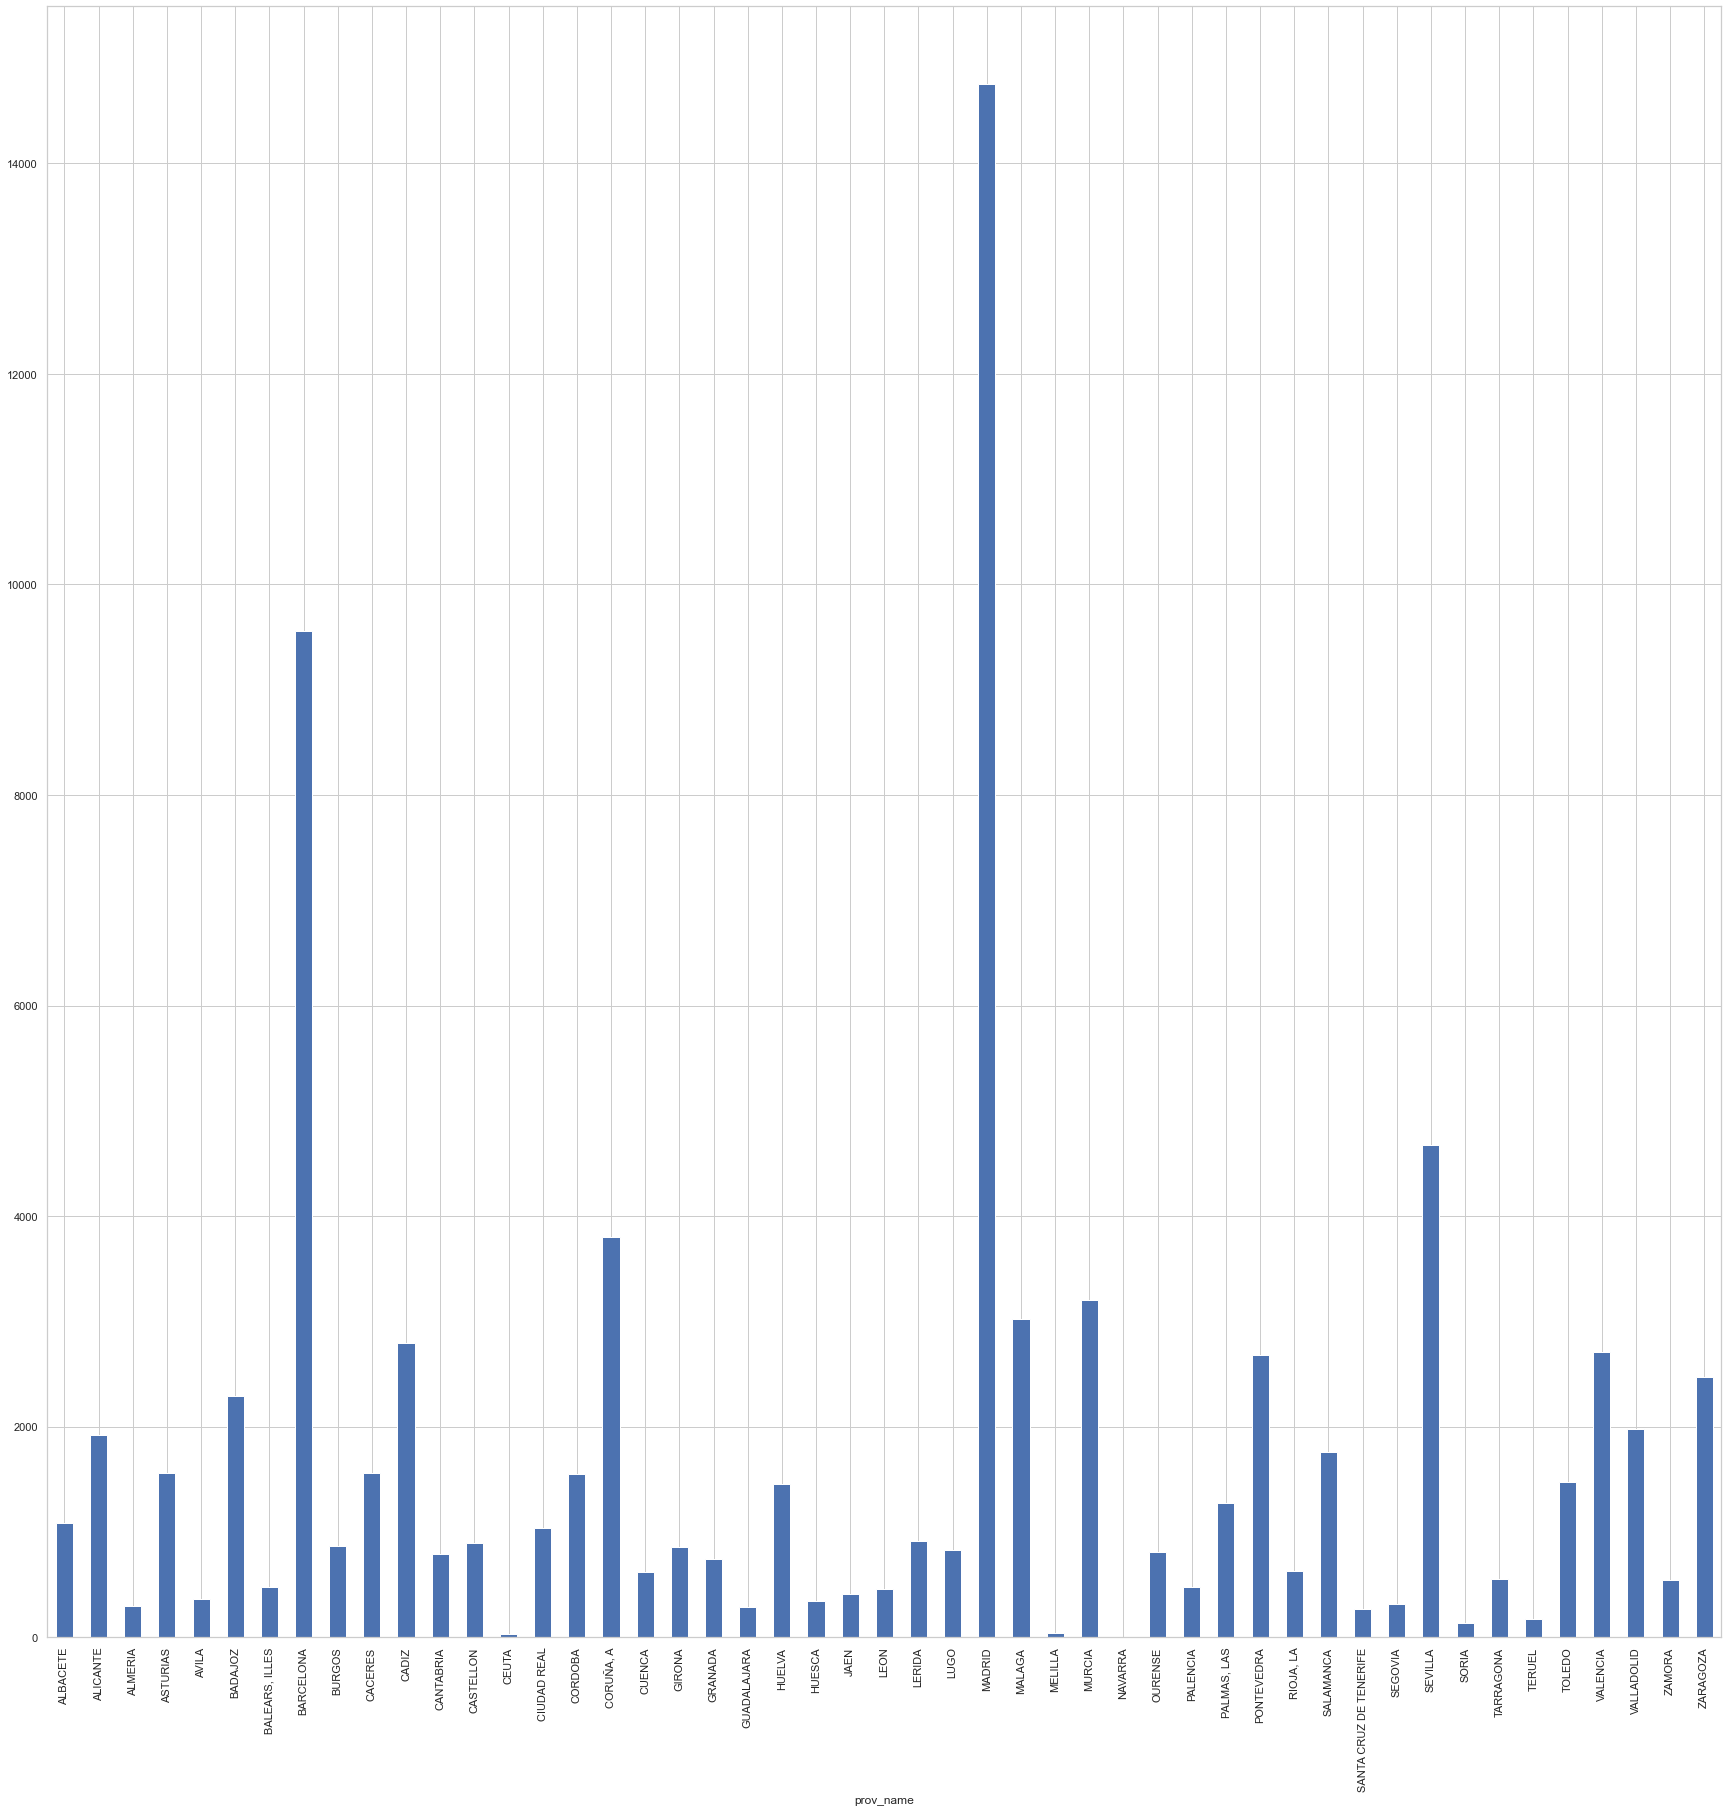

In [24]:
df2.groupby(['prov_name']).size().plot(kind = "bar")


In [25]:
dfy = pd.read_csv("train_ver2.csv",nrows=100000)


In [26]:
for col in dfy.columns:
    print(col)

fecha_dato
ncodpers
ind_empleado
pais_residencia
sexo
age
fecha_alta
ind_nuevo
antiguedad
indrel
ult_fec_cli_1t
indrel_1mes
tiprel_1mes
indresi
indext
conyuemp
canal_entrada
indfall
tipodom
cod_prov
nomprov
ind_actividad_cliente
renta
segmento
ind_ahor_fin_ult1
ind_aval_fin_ult1
ind_cco_fin_ult1
ind_cder_fin_ult1
ind_cno_fin_ult1
ind_ctju_fin_ult1
ind_ctma_fin_ult1
ind_ctop_fin_ult1
ind_ctpp_fin_ult1
ind_deco_fin_ult1
ind_deme_fin_ult1
ind_dela_fin_ult1
ind_ecue_fin_ult1
ind_fond_fin_ult1
ind_hip_fin_ult1
ind_plan_fin_ult1
ind_pres_fin_ult1
ind_reca_fin_ult1
ind_tjcr_fin_ult1
ind_valo_fin_ult1
ind_viv_fin_ult1
ind_nomina_ult1
ind_nom_pens_ult1
ind_recibo_ult1


<h2>JOINIG CHANNEL</h2>

<AxesSubplot:ylabel='joining_channel'>

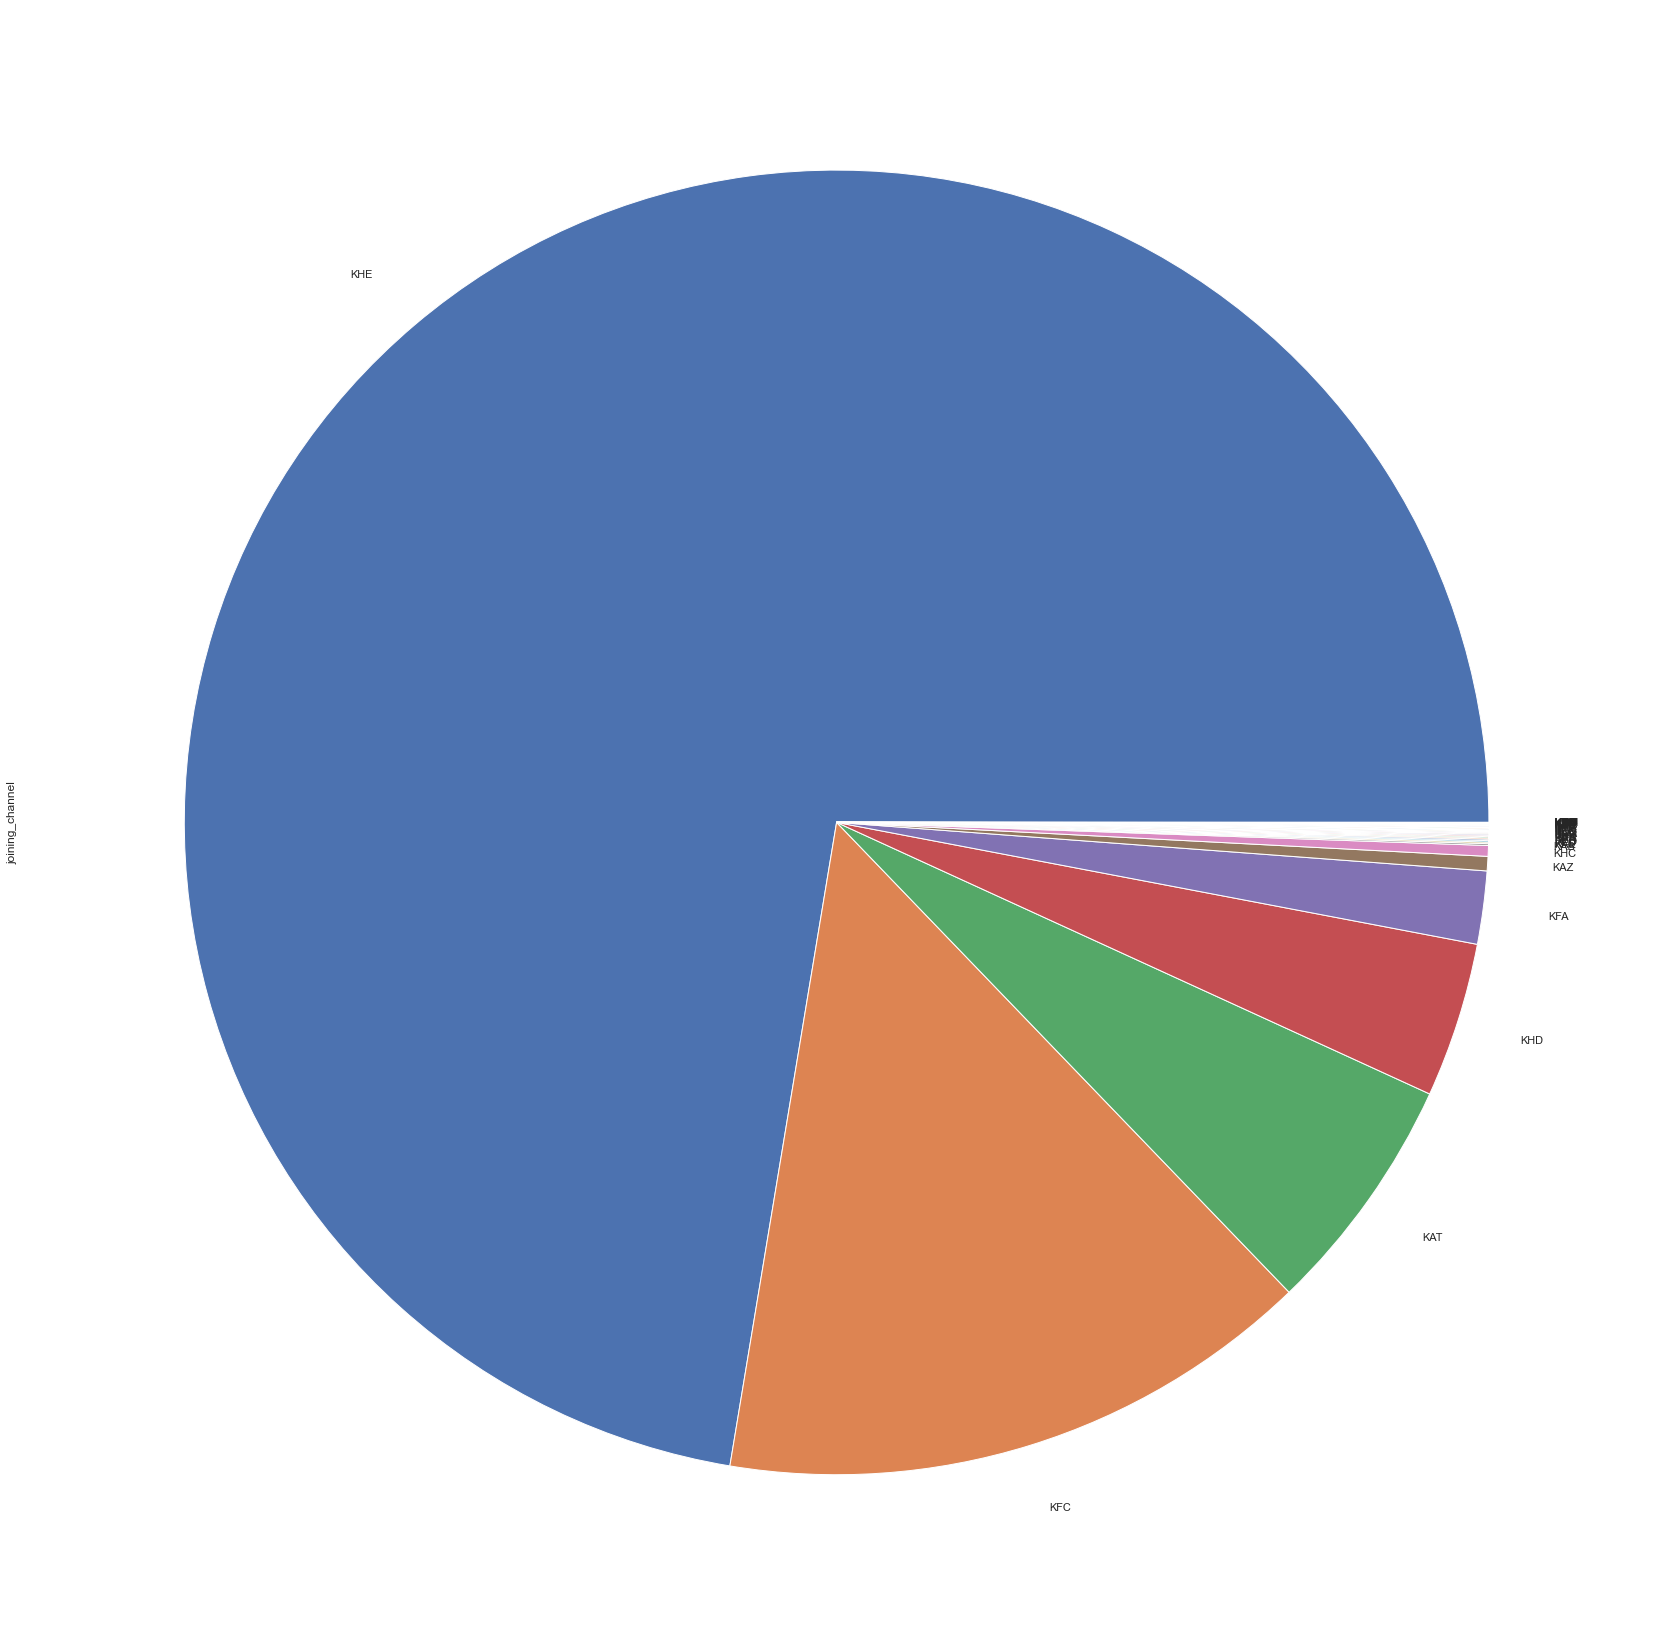

In [27]:
df2["joining_channel"].value_counts().plot(kind = 'pie')

<h2>CHECK FOR OUTLIERS</h2>

[Text(0.5, 0, 'cod_prov 41-52')]

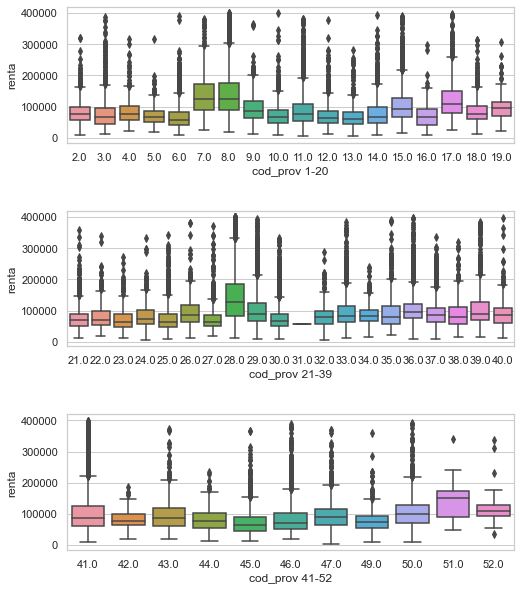

In [28]:
up_renta=400000
low_renta=0

train_select1=dfy.loc[(dfy.renta<=up_renta) & (dfy.renta>=low_renta) 
                        & (dfy.cod_prov>0) & (dfy.cod_prov<=20) ]

train_select2=dfy.loc[(dfy.renta<=up_renta) & (dfy.renta>=low_renta) 
                        & (dfy.cod_prov>20) & (dfy.cod_prov<=40) ]

train_select3=dfy.loc[(dfy.renta<=up_renta) & (dfy.renta>=low_renta) 
                        & (dfy.cod_prov>40) ]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
plt.subplots_adjust(hspace=0.5)

boxplot1=sns.boxplot(x='cod_prov', y='renta', data=train_select1, ax=axes[0])
boxplot2=sns.boxplot(x='cod_prov', y='renta', data=train_select2, ax=axes[1])
boxplot3=sns.boxplot(x='cod_prov', y='renta', data=train_select3, ax=axes[2])

boxplot1.set(xlabel='cod_prov 1-20')
boxplot2.set(xlabel='cod_prov 21-39')
boxplot3.set(xlabel='cod_prov 41-52')

<h2>GENDER RATIO</h2>

<AxesSubplot:>

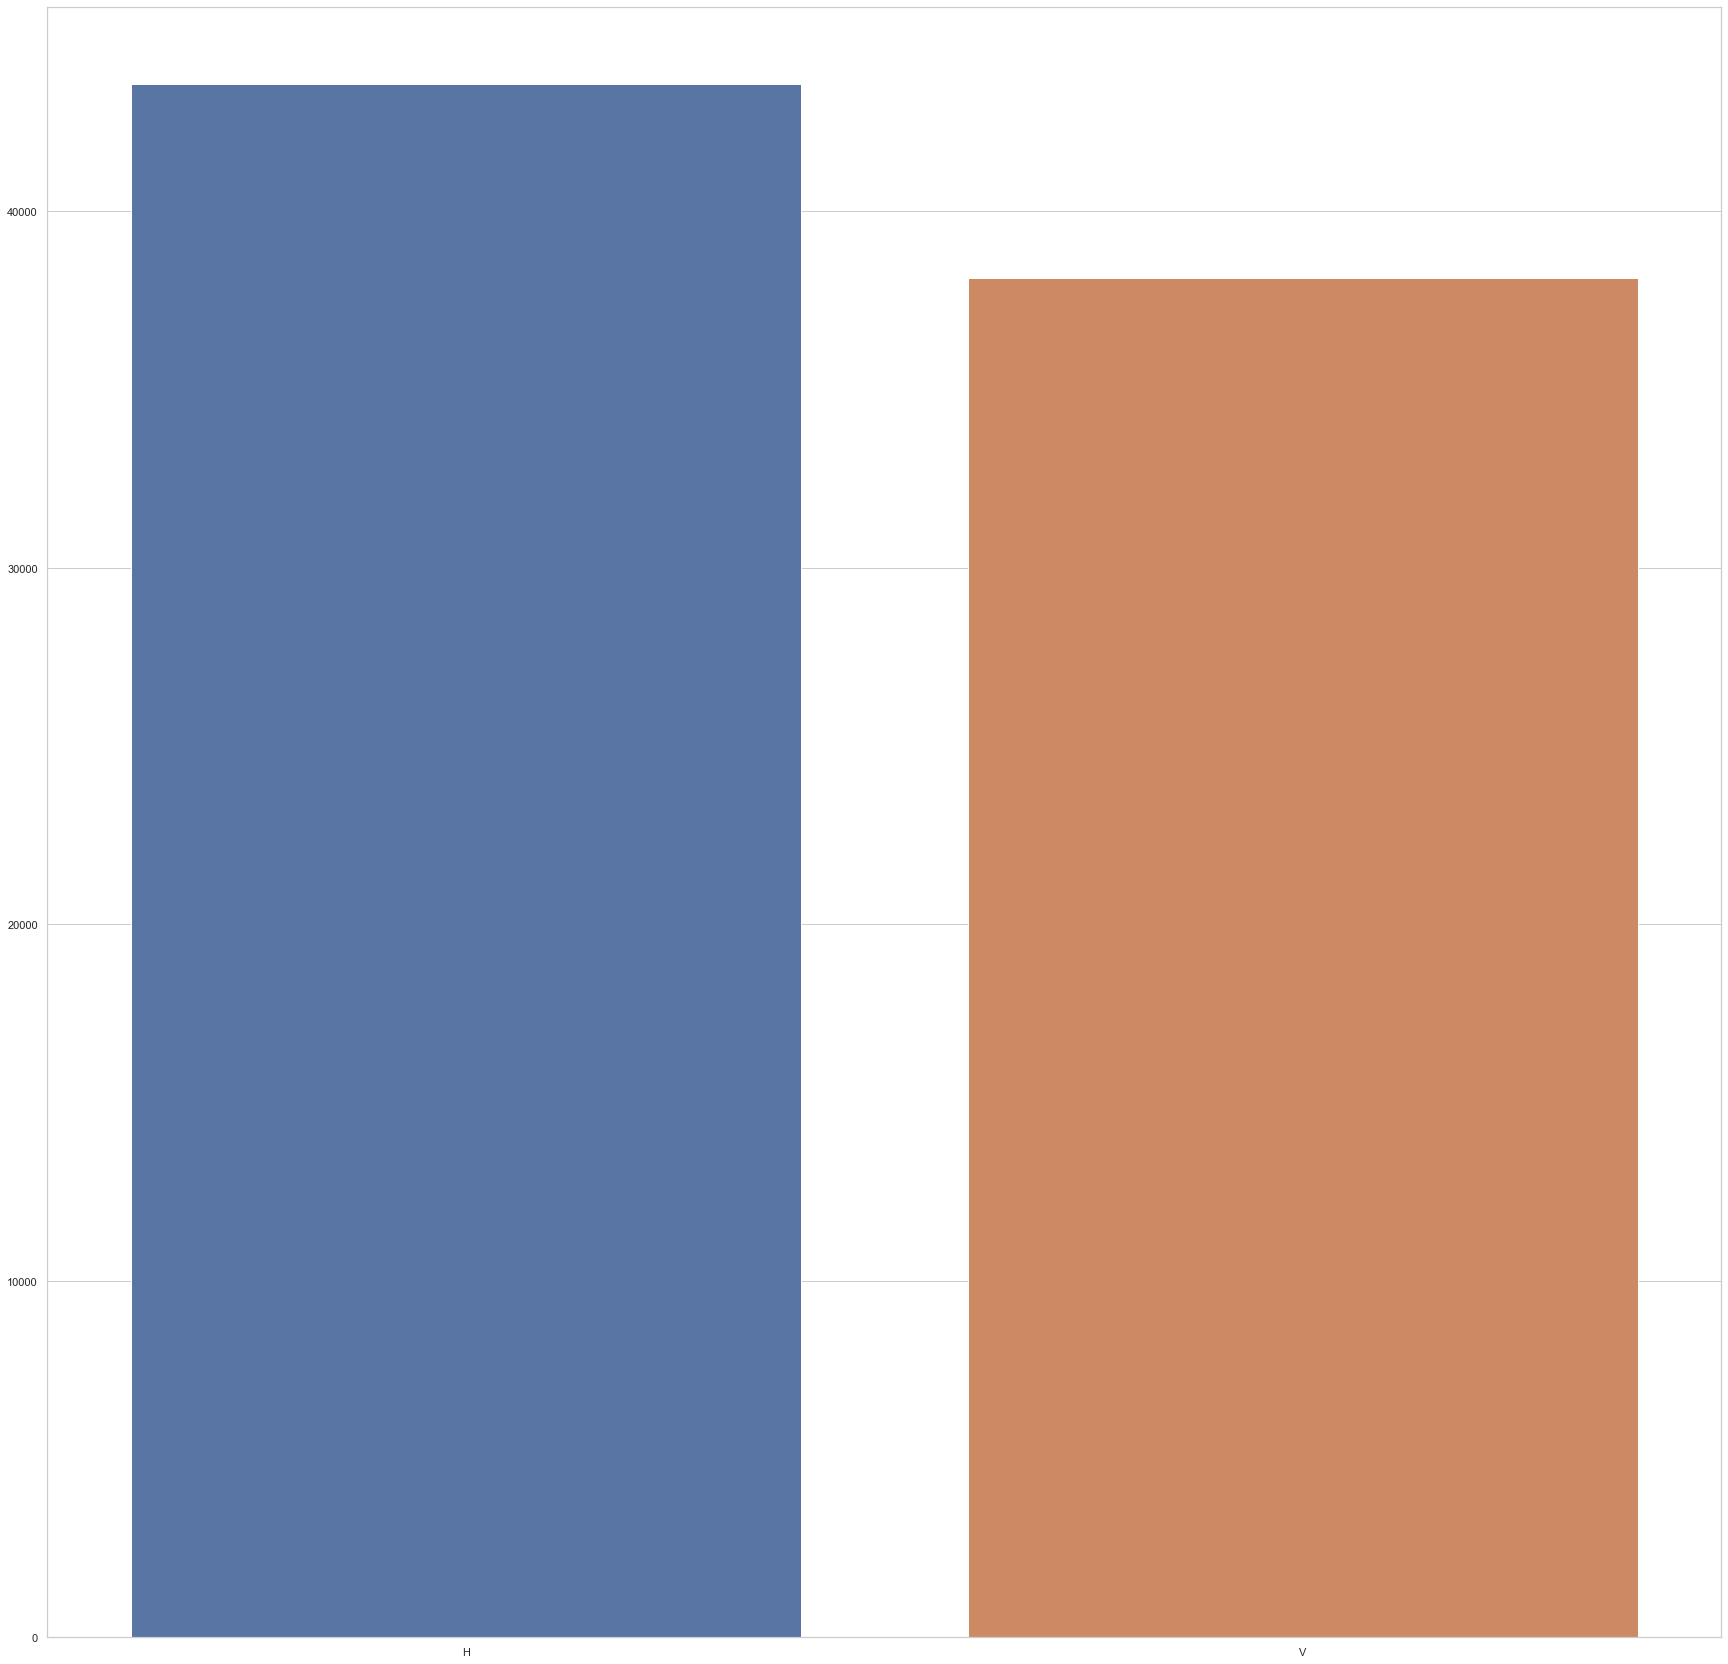

In [29]:
gender=df2["sex"].value_counts()
gender = gender[:,]
sb.barplot(gender.index, gender.values)

<h1>MAKING PREDICTIONS</h1>

In [30]:
usecols = ['ncodpers', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

In [31]:
df_train = pd.read_csv('train_ver2.csv',usecols=usecols)
sample = pd.read_csv('sample_submission.csv')

In [32]:
df_train = df_train.drop_duplicates(['ncodpers'], keep='last')

df_train.fillna(0, inplace=True)

In [33]:
df_train.tail()

,ncodpers,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
13647304,1166765,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,1166764,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,1166763,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,1166789,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647308,1550586,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


<h1>BASIC MODEL - RANKING ACCORDING TO POPULARITY</h1>

In [34]:
pro_col = usecols[1:]

In [35]:
product_list = df_train[pro_col].sum(axis=0).tolist()

In [36]:
#popularity
id_preds = {}
for row in sample.values:
    id = row[0]
    id_preds[id] = product_list

In [37]:
# check if customer already have each product or not. 
already_active = {}
for row in df_train.values:
    row = list(row)
    id = row.pop(0)
    active = [c[0] for c in zip(df_train.columns[1:], row) if c[1] > 0]
    already_active[id] = active
print(already_active[15889])
    
# add 7 products(that user don't have yet), higher probability first -> train_pred   
train_preds = {}
for id, p in id_preds.items():
    # Here be dragons
    preds = [i[0] for i in sorted([i for i in zip(df_train.columns[1:], p) if i[0] not in already_active[id]],
                                  key=lambda i:i [1], 
                                  reverse=True)[:7]]
    train_preds[id] = preds
    
test_preds = []
for row in sample.values:
    id = row[0]
    p = train_preds[id]
    test_preds.append(' '.join(p))
    
sample['added_products'] = test_preds

['ind_cco_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1']


In [39]:
sample.to_csv('popularity.csv', index=False)

In [40]:
df_train[pro_col].sum(axis=0).sort_values()

ind_aval_fin_ult1        16.0
ind_ahor_fin_ult1        78.0
ind_cder_fin_ult1       316.0
ind_deco_fin_ult1       318.0
ind_deme_fin_ult1      1021.0
ind_pres_fin_ult1      2244.0
ind_viv_fin_ult1       2961.0
ind_hip_fin_ult1       4560.0
ind_plan_fin_ult1      7367.0
ind_ctju_fin_ult1      7602.0
ind_ctma_fin_ult1      8103.0
ind_fond_fin_ult1     14713.0
ind_valo_fin_ult1     21426.0
ind_dela_fin_ult1     31220.0
ind_ctpp_fin_ult1     33284.0
ind_tjcr_fin_ult1     34843.0
ind_reca_fin_ult1     47555.0
ind_nomina_ult1       48374.0
ind_nom_pens_ult1     52923.0
ind_cno_fin_ult1      73110.0
ind_ecue_fin_ult1     75946.0
ind_ctop_fin_ult1    100658.0
ind_recibo_ult1      113602.0
ind_cco_fin_ult1     562259.0
dtype: float64

<h1>LOGISTIC REGRESSION</h1>

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from collections import defaultdict

In [42]:
models = {}
model_preds = {}
id_preds = defaultdict(list)
ids = df_train['ncodpers'].values
for c in df_train.columns:
    if c != 'ncodpers':
        print(c)
        y_train = df_train[c]
        x_train = df_train.drop([c, 'ncodpers'], 1)
        
        clf = LogisticRegression()
        clf.fit(x_train, y_train)
        p_train = clf.predict_proba(x_train)[:,1]
        
        models[c] = clf
        model_preds[c] = p_train
        for id, p in zip(ids, p_train):
            id_preds[id].append(p)
            
        print(roc_auc_score(y_train, p_train))
        

ind_ahor_fin_ult1
0.7874078773631549
ind_aval_fin_ult1
0.9805999112508611
ind_cco_fin_ult1
0.6501703059911546
ind_cder_fin_ult1
0.7878490961699784
ind_cno_fin_ult1
0.9714743915313822
ind_ctju_fin_ult1
0.8655533428519265
ind_ctma_fin_ult1
0.6615879690930808
ind_ctop_fin_ult1
0.6127802351766946
ind_ctpp_fin_ult1
0.7223762703986949
ind_deco_fin_ult1
0.8880309784961913
ind_deme_fin_ult1
0.8675207178882735
ind_dela_fin_ult1
0.781867833808789
ind_ecue_fin_ult1
0.7753412858323321
ind_fond_fin_ult1
0.8565828841494412
ind_hip_fin_ult1
0.918171553356258
ind_plan_fin_ult1
0.8480963243337825
ind_pres_fin_ult1
0.7096122038065067
ind_reca_fin_ult1
0.8344131647201776
ind_tjcr_fin_ult1
0.9051704169008244
ind_valo_fin_ult1
0.8406418502129752
ind_viv_fin_ult1
0.7680928908740817
ind_nomina_ult1
0.99817996016916
ind_nom_pens_ult1
0.9983109510224352
ind_recibo_ult1
0.8674955033315173


In [43]:
# check if customer already have each product or not. 
already_active = {}
for row in df_train.values:
    row = list(row)
    id = row.pop(0)
    active = [c[0] for c in zip(df_train.columns[1:], row) if c[1] > 0]
    already_active[id] = active

# add 7 products(that user don't have yet), higher probability first -> train_pred   
train_preds = {}
for id, p in id_preds.items():
    # Here be dragons
    preds = [i[0] for i in sorted([i for i in zip(df_train.columns[1:], p) if i[0] not in already_active[id]],
                                  key=lambda i:i [1], 
                                  reverse=True)[:7]]
    train_preds[id] = preds
    
test_preds = []
for row in sample.values:
    id = row[0]
    p = train_preds[id]
    test_preds.append(' '.join(p))

In [44]:
sample['added_products'] = test_preds

sample.to_csv('logistic.csv', index=False)

<h1>GBR</h1>

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from collections import defaultdict

In [50]:
models = {}
model_preds = {}
id_preds = defaultdict(list)
ids = df_train['ncodpers'].values
for c in df_train.columns:
    if c != 'ncodpers':
        print(c)
        y_train = df_train[c]
        x_train = df_train.drop([c, 'ncodpers'], 1)
        
        clf = GradientBoostingClassifier(max_depth=2,learning_rate=0.7)
        clf.fit(x_train, y_train)
        p_train = clf.predict_proba(x_train)[:,1]
        
        models[c] = clf
        model_preds[c] = p_train
        for id, p in zip(ids, p_train):
            id_preds[id].append(p)
            
        print(roc_auc_score(y_train, p_train))
        

ind_ahor_fin_ult1
0.7998121112215577
ind_aval_fin_ult1
0.9870421291848774
ind_cco_fin_ult1
0.6506160521173407
ind_cder_fin_ult1
0.7895597747324681
ind_cno_fin_ult1
0.9729927325678793
ind_ctju_fin_ult1
0.8655731130412647
ind_ctma_fin_ult1
0.6648304522878242
ind_ctop_fin_ult1
0.6186791436305664
ind_ctpp_fin_ult1
0.7334664284026491
ind_deco_fin_ult1
0.8897831340327375
ind_deme_fin_ult1
0.8661942671619692
ind_dela_fin_ult1
0.7818068500029688
ind_ecue_fin_ult1
0.7802606898746102
ind_fond_fin_ult1
0.8548995644142572
ind_hip_fin_ult1
0.9195447029736858
ind_plan_fin_ult1
0.7363562307224895
ind_pres_fin_ult1
0.7279020851205903
ind_reca_fin_ult1
0.6252000153650873
ind_tjcr_fin_ult1
0.9019218672721456
ind_valo_fin_ult1
0.8407078717894072
ind_viv_fin_ult1
0.7693331779558497
ind_nomina_ult1
0.9974957914543127
ind_nom_pens_ult1
0.998364139699611
ind_recibo_ult1
0.8700527666632862


In [ ]:
# check if customer already have each product or not. 
already_active = {}
for row in df_train.values:
    row = list(row)
    id = row.pop(0)
    active = [c[0] for c in zip(df_train.columns[1:], row) if c[1] > 0]
    already_active[id] = active

# add 7 products(that user don't have yet), higher probability first -> train_pred   
train_preds = {}
for id, p in id_preds.items():
    # Here be dragons
    preds = [i[0] for i in sorted([i for i in zip(df_train.columns[1:], p) if i[0] not in already_active[id]],
                                  key=lambda i:i [1], 
                                  reverse=True)[:7]]
    train_preds[id] = preds
    
test_preds = []
for row in sample.values:
    id = row[0]
    p = train_preds[id]
    test_preds.append(' '.join(p))

In [ ]:
sample['added_products'] = test_preds

sample.to_csv('gbc.csv', index=False)